# Kaggle-Medical Cost Dataset

Este trabajo es realizado con la base de datos del sitio Kaggle y puede ser descargada en el siguiente enlace
https://www.kaggle.com/mirichoi0218/insurance

In [2]:
# Importamos las librerías que se ocuparán
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# colab
# data = "/content/insurance.csv"
data = "insurance.csv"
df = pd.read_csv(data)

In [3]:
# Vemos algunos valores del dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Revisamos estadísticas básicas
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### ¿Existen valores nulos en alguna columna?

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

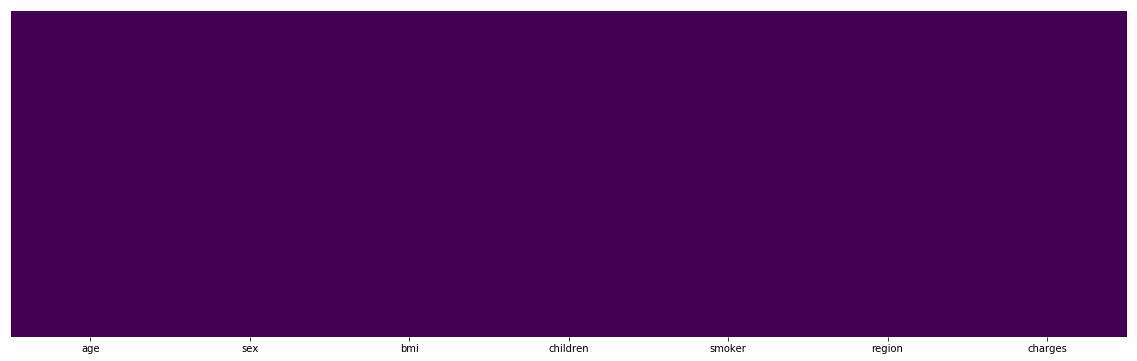

In [4]:
plt.figure(figsize=(20, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No existen valores nulos en los datos

### Gráfica la distribución de la columna “charges”

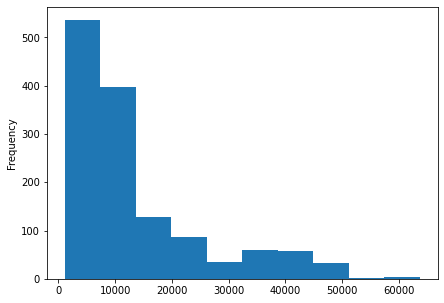

In [38]:
df["charges"].plot.hist(figsize=(7,5),bins=10)

### Gráfica de la distribución conjunta de “charges” y “age” para los no fumadores

In [12]:
# Filtramos los datos por no fumadores
df_no = df[df.smoker == "no"]
df_no.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


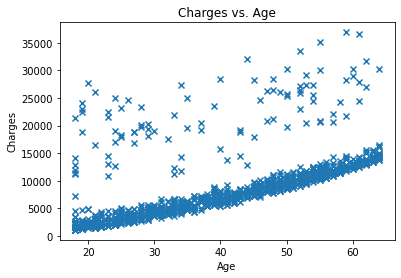

In [15]:
# Graficamos
X = df_no["age"]
Y = df_no["charges"]

plt.scatter(X, Y, marker = "x")

plt.title("Charges vs. Age")
plt.xlabel("Age")
plt.ylabel("Charges");

Claramente se ve en la gráfica que existen muchos valores que están alejados de la mayoría de las observaciones, sin embargo, para la modelación se dejarán para ver qué tanto afectan al modelo.

### Gráfica de la matriz de correlación entre las variables

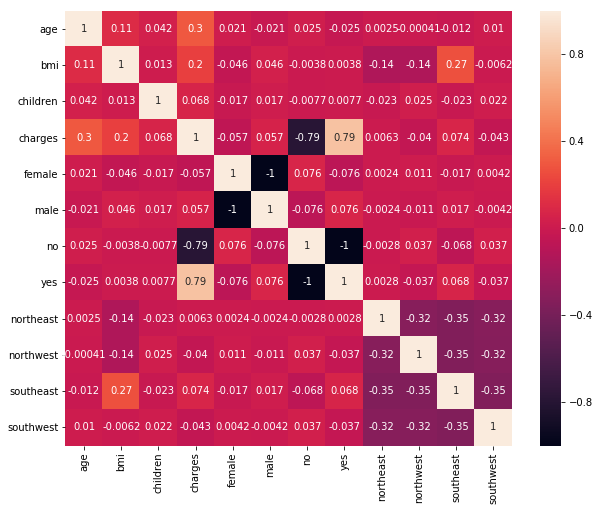

In [3]:
# Creamos valores dummy de variables categóricas
sex_b = pd.get_dummies(df.sex)
smoker_b = pd.get_dummies(df.smoker)
region_b = pd.get_dummies(df.region)
# Filtramos solo las variables numericas
df_num = df.filter(["age","bmi","children","charges"]) 
# Unimos los valores
df_r = pd.concat([df_num,sex_b,smoker_b,region_b],axis=1)
# Calculamos la matriz de correlación
corMat = df_r.corr()
# Se grafica
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(corMat, annot=True,ax=ax)
plt.show()

### Ajustamos los siguientes modelos de regresión y se comparan las métricas de R^2 para cada uno de ellos
#### Todas las variables


- a. Linear Regression

In [8]:
# Separamos Y y x
Y = df_r["charges"]
x = df_r.drop("charges",axis=1)

In [57]:
# Se importa train_test_split
from sklearn.model_selection import train_test_split
# Dividimos los datos
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state=1)

In [58]:
# Se importa el módulo para realizar la regresión
from sklearn.linear_model import LinearRegression
# Creamos el modelo de regresión
Lr_1 = LinearRegression()
# Ajustamos los datos de train
Lr_1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
# Revisamos los valores obtenidos del modelo
print ("INTERCEPT : ",Lr_1.intercept_)
print ("CO-EFFICIENT : ",Lr_1.coef_)

INTERCEPT :  321.15345829133366
CO-EFFICIENT :  [   251.68186515    322.38910684    344.9642553     141.3981733
   -141.3981733  -12029.69523846  12029.69523846    527.9051883
    223.81509065   -411.4369086    -340.28337035]


In [60]:
# Predecimos los resultados del test data
y_prediction =  Lr_1.predict(x_test)
y_prediction[:5]

array([ 4610.31554087, 12887.89388015, 12573.9487516 , 13197.83662603,
         629.33718201])

In [61]:
# Se importa el módulo r2_score para calcular la r^2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7406
El error medio absoluto es 4139.9321
El error medio cuadrado es 36761456.352
La raíz cuadrada del error cuadrado medio es 6063.1227


- b. Ridge Regression

In [62]:
from sklearn.linear_model import Ridge
# Usamos alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(x_train, y_train)
y_prediction = ridgereg.predict(x_test)

In [63]:
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7378
El error medio absoluto es 4201.6162
El error medio cuadrado es 37155235.7847
La raíz cuadrada del error cuadrado medio es 6095.5095


In [64]:
# Examinamos los coeficientes
print(ridgereg.coef_)

[   229.83471377    295.80104766    315.47561837     96.91281729
    -96.91281729 -11449.09080424  11449.09080424    460.42595706
    171.46712697   -287.3026961    -310.69809017]


In [65]:
# Creamos un arreglo con varios valores de alpha para determinar cuál es el mejor 
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [66]:
# Selecionamos el mejor alpha con RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(x_train, y_train)
ridgeregcv.alpha_

0.01

In [67]:
# Predecimos los resultados del modelo
y_prediction = ridgeregcv.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7405
El error medio absoluto es 4144.0044
El error medio cuadrado es 36773622.8669
La raíz cuadrada del error cuadrado medio es 6064.1259


- c. Lasso Regression

In [68]:
# Probamos alpha=0.001 y examinamos los coeficientes
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_.round(2))

[   251.68    322.38    344.94    282.73     -0.   -24059.31      0.
    805.96    501.88   -133.24    -62.1 ]


In [80]:
# Probamos alpha=0.01 y examinamos los coeficientes
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_.round(2))

[   251.66    322.32    344.72    282.09     -0.   -24058.55      0.
    805.05    501.06   -132.89    -61.88]


In [81]:
# Predecimos los resultados del modelo
y_prediction = lassoreg.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7406
El error medio absoluto es 4139.9093
El error medio cuadrado es 36761944.2794
La raíz cuadrada del error cuadrado medio es 6063.1629


In [87]:
# Selecionamos el mejor alpha con LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(x_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  3.9110093141453883


In [88]:
# Examinamos los coeficientes
print(lassoregcv.coef_.round(2))

[ 2.446500e+02  2.937200e+02  2.477300e+02  5.290000e+00 -0.000000e+00
 -2.372955e+04  0.000000e+00  3.925200e+02  1.256800e+02 -1.350000e+00
 -0.000000e+00]


In [89]:
# Predecimos los resultados del modelo
y_prediction = lassoregcv.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7383
El error medio absoluto es 4141.4784
El error medio cuadrado es 37080888.5449
La raíz cuadrada del error cuadrado medio es 6089.4079


- d. KNN regression

In [139]:
# Creamos el modelo con nn=3
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
reg_knn = KNeighborsRegressor(n_neighbors=3)
reg_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [140]:
# Predecimos los resultados del modelo
y_prediction = reg_knn.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.1998
El error medio absoluto es 6844.8738
El error medio cuadrado es 113401093.1798
La raíz cuadrada del error cuadrado medio es 10648.9949


In [141]:
# Con una función cálculamos el valor de varios nn para obtener los valores de RMSE y encontrar el mejor nn para el modelo
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(15):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 12652.418511865759
RMSE value for k=  2 is: 10783.66196072841
RMSE value for k=  3 is: 10648.99493754205
RMSE value for k=  4 is: 10543.267850790573
RMSE value for k=  5 is: 10318.721959490424
RMSE value for k=  6 is: 10262.854974643531
RMSE value for k=  7 is: 10255.504315845656
RMSE value for k=  8 is: 10145.916207005377
RMSE value for k=  9 is: 10159.838996220766
RMSE value for k=  10 is: 10217.935759793898
RMSE value for k=  11 is: 10344.87384117587
RMSE value for k=  12 is: 10437.936796199567
RMSE value for k=  13 is: 10416.168601488256
RMSE value for k=  14 is: 10502.350170775122
RMSE value for k=  15 is: 10565.65245233355


In [143]:
# Realizamo modelo con nn=8
reg_knn = KNeighborsRegressor(n_neighbors=8)
reg_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')

In [144]:
# Predecimos los resultados del modelo
y_prediction = reg_knn.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.2736
El error medio absoluto es 7205.7916
El error medio cuadrado es 102939615.6796
La raíz cuadrada del error cuadrado medio es 10145.9162


### Seleccionando variables

- a. Linear Regression

In [86]:
# Separamos Y y x
Y = df_r["charges"]
x = df_r[["age","bmi","children","male","yes","southeast"]]

In [87]:
# Se importa train_test_split
from sklearn.model_selection import train_test_split
# Dividimos los datos
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3, random_state=1)

In [88]:
# Se importa el módulo para realizar la regresión
from sklearn.linear_model import LinearRegression
# Creamos el modelo de regresión
Lr_1 = LinearRegression()
# Ajustamos los datos de train
Lr_1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
# Revisamos los valores obtenidos del modelo
print ("INTERCEPT : ",Lr_1.intercept_)
print ("CO-EFFICIENT : ",Lr_1.coef_)

INTERCEPT :  -11270.113105236464
CO-EFFICIENT :  [  251.61338789   316.79497679   335.59489684  -269.59025937
 24071.83714871  -519.88707977]


In [90]:
# Predecimos los resultados del test data
y_prediction =  Lr_1.predict(x_test)
y_prediction[:5]

array([ 4496.6765307 , 12793.97331301, 13013.99355897, 13150.04051189,
        1144.30066034])

In [91]:
# Se importa el módulo r2_score para calcular la r^2
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7395
El error medio absoluto es 4128.8097
El error medio cuadrado es 36916832.5376
La raíz cuadrada del error cuadrado medio es 6075.9224


- b. Ridge Regression

In [33]:
from sklearn.linear_model import Ridge
# Usamos alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(x_train, y_train)
y_prediction = ridgereg.predict(x_test)

In [34]:
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7345
El error medio absoluto es 4292.277
El error medio cuadrado es 37623019.1108
La raíz cuadrada del error cuadrado medio es 6133.7606


In [35]:
# Examinamos los coeficientes
print(ridgereg.coef_)

[  229.51776937   291.13305885   305.94530856  -124.3128328
 21861.79189475  -327.30861576]


In [36]:
# Creamos un arreglo con varios valores de alpha para determinar cuál es el mejor 
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [37]:
# Selecionamos el mejor alpha con RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(x_train, y_train)
ridgeregcv.alpha_

0.01

In [38]:
# Predecimos los resultados del modelo
y_prediction = ridgeregcv.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7396
El error medio absoluto es 4142.288
El error medio cuadrado es 36909938.8709
La raíz cuadrada del error cuadrado medio es 6075.355


- c. Lasso Regression

In [39]:
# Probamos alpha=0.001 y examinamos los coeficientes
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_.round(2))

[  251.61   316.79   335.57  -269.52 24071.75  -519.8 ]


In [40]:
# Probamos alpha=0.01 y examinamos los coeficientes
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(x_train, y_train)
print(lassoreg.coef_.round(2))

[  251.6    316.73   335.36  -268.89 24070.98  -518.98]


In [41]:
# Predecimos los resultados del modelo
y_prediction = lassoreg.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7395
El error medio absoluto es 4128.8005
El error medio cuadrado es 36917277.5144
La raíz cuadrada del error cuadrado medio es 6075.959


In [42]:
# Selecionamos el mejor alpha con LassoCV
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(x_train, y_train)
print('alpha : ',lassoregcv.alpha_)

alpha :  5.944386402101726


In [43]:
# Examinamos los coeficientes
print(lassoregcv.coef_.round(2))

[  240.86   279.3    194.16    -0.   23576.98    -0.  ]


In [44]:
# Predecimos los resultados del modelo
y_prediction = lassoregcv.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.7361
El error medio absoluto es 4153.2556
El error medio cuadrado es 37391991.9475
La raíz cuadrada del error cuadrado medio es 6114.8992


- d. KNN regression

In [45]:
# Creamos el modelo con nn=3
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
reg_knn = KNeighborsRegressor(n_neighbors=3)
reg_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [46]:
# Predecimos los resultados del modelo
y_prediction = reg_knn.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.0874
El error medio absoluto es 7412.4333
El error medio cuadrado es 129325966.3768
La raíz cuadrada del error cuadrado medio es 11372.1575


In [47]:
# Con una función cálculamos el valor de varios nn para obtener los valores de RMSE y encontrar el mejor nn para el modelo
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(15):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 13296.36729030142
RMSE value for k=  2 is: 11240.189295321505
RMSE value for k=  3 is: 11372.157507564078
RMSE value for k=  4 is: 11283.026284018095
RMSE value for k=  5 is: 11096.664263615068
RMSE value for k=  6 is: 11044.928204370244
RMSE value for k=  7 is: 10929.261631768231
RMSE value for k=  8 is: 10982.088540369077
RMSE value for k=  9 is: 10754.485374495083
RMSE value for k=  10 is: 10743.384030410472
RMSE value for k=  11 is: 10796.703339367989
RMSE value for k=  12 is: 10887.301540752838
RMSE value for k=  13 is: 10850.433342899816
RMSE value for k=  14 is: 10893.378750849586
RMSE value for k=  15 is: 10855.60904033853


In [48]:
# Realizamo modelo con nn=10
reg_knn = KNeighborsRegressor(n_neighbors=10)
reg_knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [49]:
# Predecimos los resultados del modelo
y_prediction = reg_knn.predict(x_test)
# Calculamos la precisión de predicción del modelo
score=r2_score(y_test,y_prediction)
print("El valor de la r^2 es",score.round(4))
print ("El error medio absoluto es",mean_absolute_error(y_test, y_prediction).round(4))
print("El error medio cuadrado es",mean_squared_error(y_test,y_prediction).round(4))
print("La raíz cuadrada del error cuadrado medio es",np.sqrt(mean_squared_error(y_test,y_prediction)).round(4))

El valor de la r^2 es 0.1856
El error medio absoluto es 7975.8746
El error medio cuadrado es 115420300.4249
La raíz cuadrada del error cuadrado medio es 10743.384


### ¿Cuáles son las mejores variables para la predicción de “charges”?

Al ajustar los distintos modelos con todas las variables se obtuvieron mejores resultados,que al ajustarse los modelos con las variables que en la matriz de correlación sugerían tener una mayor relación con nuestra variable dependiente (charges).  
Por lo tanto todas las variables son necesarias para una buena predictibilidad en el modelo.

### ¿Cuál modelo entrega mejor predictibilidad? y ¿por qué?

Los modelos en general tuvieron casi los mismos resultados, a excepción del modelo de KNN regression el cual ni encontrando los mejores hiperparámetros obtuvo a lo más el valor de R^2 igual a 0.2736.  
Linear regression y Lasso regression obtuvieron el mismo valor de R^2 de 0.7406, con respecto al MAE el valor más bajo lo obtuvo el modelo de Lasso regression(4139.9093), a lo que respecta al valor de RMSE el valor más bajo fue para Linear regression(6063.1227).  
Los valores de Ridge regression fueron muy similares con R^2 de 0.7405, MAE de 4144.0044 y RMSE igual a 6064.1259.  
Por lo anterior el mejor modelo es el de Linear regression, ya que aunque no obtuvo el valor más bajo en MAE(4139.9321), éste valor sólo es importante cuando no se toman en cuenta los valores extremos observados, pero en este caso si nos importan ya que existe una gran variabilidad en los datos a predecir.

### Conclusiones

Derivado de la necesidad que tiene la aseguradora por efectuar un cobro a sus nuevos pacientes, se han analizado varios caminos que resuelvan de manera eficiente y efectiva esta problemática.  
Se ha llegado a la conclusión de que generando un modelo matemático sería la mejor opción. Recomendando realizar un modelo de regresión lineal, el cuál podrá predecir con un grado de precisión el monto que se debe cobrar al nuevo paciente, basandose en los datos históricos de la aseguradora.  
Dicho modelo podrá ahorrar a la aseguradora tiempo en la determinación del monto a cobrar, ya que el modelo predice el 74 por ciento de los posibles pacientes nuevos, este modelo se basa en datos históricos almacenados y no requerirá de mayor información, más que de su edad, historial clínico básico y un comprobante domiciliario, también permitirá ahorrar a la aseguradora miles de dolares cuando se cobre lo justo al paciente dadas sus características específicas y no tenga que cubrir gastos médicos que no se tenían contemplados en el perfil del paciente.  
La importancia de la realización e implementación del modelo está dada por el ahorro en tiempo y dinero que generará el modelo dentro de la aseguradora.